In [1]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


<h1>Objetivos</h1>
<ul>
  <li>1. Filtrar e sortir as informações desnessárias</li>
  <li>2. Descubrir uma tendência entre os sobreviventes e os não sobreviventes</li>
    <li>3. Propor melhorias para a segurança de navios </li>
</ul>




In [3]:
#Carregando e mostrando a tabela
tabela = pd.read_excel("Titanic.xlsx")
display(tabela)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Nova secção

<ul>
    <li>PassengerId - Um identificador único para cada passageiro.
 </li>
    <li>Survived - Mostra se o passageiro sobreviveu ou não (0 = Não, 1 = Sim). </li>
    <li>Pclass - A classe do passageiro (1 = 1ª, 2 = 2ª, 3 = 3ª). </li>
    <li>Name - O nome do passageiro. </li>
    <li>Sex - O gênero do passageiro. </li>
    <li>Age - A idade do passageiro. </li>
    <li>SibSp - O número de irmãos/cônjuges a bordo.
 </li>
    <li>Parch - O número de pais/filhos a bordo. </li>
    <li>Ticket - O número do bilhete. </li>
    <li>Fare - A tarifa paga pelo bilhete. </li>
    <li>Cabin - O número da cabine. </li>
    <li>Embarked - O porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton). </li>
    </ul>
    


<h1>Motivação pelo qual certas colunas são importantes e outras não:</h1>
<ul>
    <li>PassengerId: No final das contas é apenas um número</li>
    <li>Survived: O coluna chave da nossa pesquisa</li>
    <li>Pclass: Identifica a "Classe social" da pessoa dentro do návio, útil pois quanto mais cara a classe melhor os serviços dentro do návio, o que poderia incluir o escape dele </li>
    <li>Sexo: O sexo da pessoa, pode ser útil pois mulheres são tradicionalmente evacuadas primeiro</li>
    <li>SibSp: Número de irmãos ou cônjuges a bordo, útil pois adiciona um valor emocional a nossa pesquisa, alguém pode não querer fugir do navio sem ser entes queridos</li>
    <li>Parch: Mesma motivação do SibSp, talvez até mais agravado</li>
    <li>Fare: Parece irrelevante, porém vamos ver, pode ser que alguem que pagou mais caro tenha prioridade </li>
    <li>Age: Idosos ou crianças geralmente tem ajuda a escapar do navio</li>
    <li>Cabin: O número da cabine pode nos ajudar a ter uma ideia onde uma pessoa estava quando o navio bateu na geleira</li>
    <li>Embarked: Irrelevante, pois isso não afeta em nada, é apenas onde a pessoa ENTROU no Titanic</li>
    <li>Nome: O nome da pessoa pode nos ajudar a criar uma nova coluna separando os familiares de uma pessoa.</li>
    <li>Ticket: O número do ticket é irrelevante </li>
</ul>

<h1>Tirar as informações desnecessárias</h1>


<ul>
    <li>Ponto de Embarque(Embarked)</li>
    <li>ID(PassengerId)</li>
    <li>Bilhete(Ticket)</li>
   </ul>

In [4]:
columns_to_keep = [col for col in tabela.columns if col not in ["Embarked", "PassengerId", "Ticket"]]
tabela = tabela.filter(columns_to_keep)

# Display the updated DataFrame
display(tabela)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148


In [5]:
#Filtrar os sobreviventes e os não sobreviventes

survivors = tabela[tabela['Survived'] == 1]
victims = tabela[tabela['Survived'] ==0]

print("Sobreviventes:")
display(survivors)
print("Vítimas:")
display(victims)
print(f"Número de sobreviventes: {len(survivors)}") #Len descreve o valor inteiro de uma variável
print(f"Número de Vítimas: {len(victims)}")



Sobreviventes:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN
...,...,...,...,...,...,...,...,...,...
875,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,7.2250,NaN
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C50
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,26.0000,NaN
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42


Vítimas:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN
...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,NaN
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,NaN
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN


Número de sobreviventes: 342
Número de Vítimas: 549


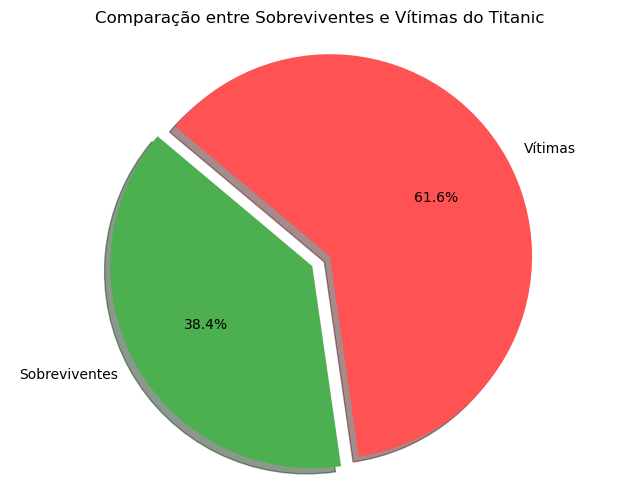

In [6]:
#Gráfico de pizza dos Sobreviventes x Vítimas

sizes = [len(survivors), len(victims)]
labels = ['Sobreviventes', 'Vítimas']
colors = ['#4CAF50', '#FF5252']
explode = (0.1, 0)  # Separa a primeira fatia para ênfase

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # A proporção igual garante que o gráfico de pizza seja desenhado como um círculo.
plt.title('Comparação entre Sobreviventes e Vítimas do Titanic')
plt.show()

Número de sobreviventes na classe 1: 136
Número de sobreviventes na classe 2: 87
Número de sobreviventes na classe 3: 119


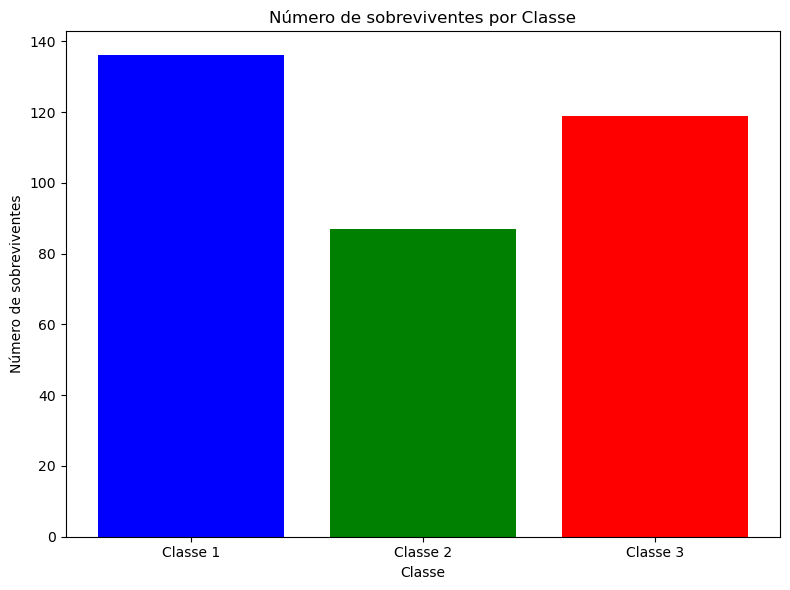

In [7]:
survivors_class = {}

# Supondo que você queira segmentar pelas classes 1, 2 e 3
for i in range(1, 4):
    survivors_class[i] = survivors[survivors['Pclass'] == i]
    print(f"Número de sobreviventes na classe {i}: {len(survivors_class[i])}")

classes = [1, 2, 3]
num_survivors = [len(survivors_class[i]) for i in classes]

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(classes, num_survivors, color=['blue', 'green', 'red'])
plt.xlabel('Classe')
plt.ylabel('Número de sobreviventes')
plt.title('Número de sobreviventes por Classe')
plt.xticks(classes, ['Classe 1', 'Classe 2', 'Classe 3'])  # Define os x-ticks para mostrar os nomes das classes
plt.tight_layout()

plt.show()


Number of victims in class 1: 80
Number of victims in class 2: 97
Number of victims in class 3: 372


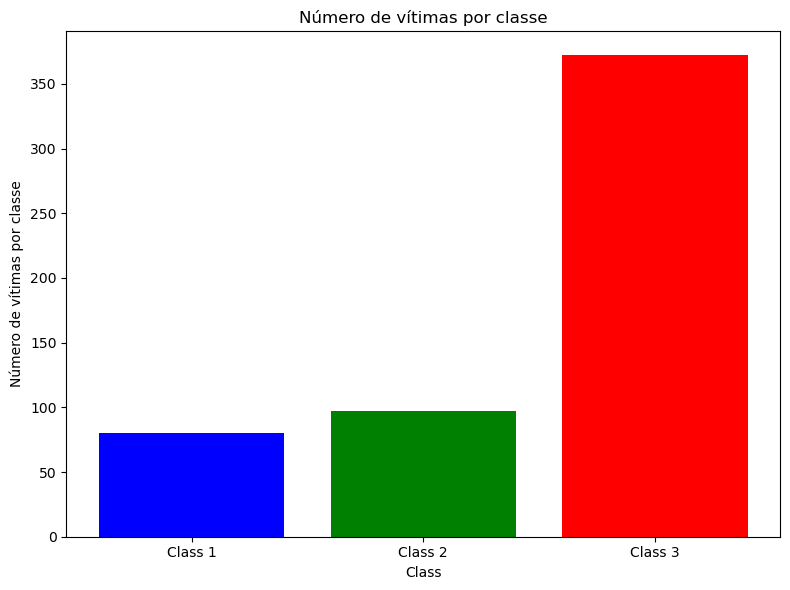

In [8]:
victims_class = {}

# Supondo que você queira segmentar pelas classes 1, 2 e 3
for i in range(1, 4):
    victims_class[i] = victims[victims['Pclass'] == i]
    print(f"Number of victims in class {i}: {len(victims_class[i])}")

num_survivors_class1 = len(survivors_class[1])
num_survivors_class2 = len(survivors_class[2])
num_survivors_class3 = len(survivors_class[3])

num_victims_class1 = len(victims_class[1])
num_victims_class2 = len(victims_class[2])
num_victims_class3 = len(victims_class[3])

classes = [1, 2, 3]
num_victims = [num_victims_class1, num_victims_class2, num_victims_class3]

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(classes, num_victims, color=['blue', 'green', 'red'])
plt.xlabel('Class')
plt.ylabel('Número de vítimas por classe')
plt.title('Número de vítimas por classe')
plt.xticks(classes, ['Class 1', 'Class 2', 'Class 3'])  # Set the x-ticks to show class names
plt.tight_layout()

plt.show()


Podemos já assumir um padrão: a maior quantidade de sobreviventes fazia parte da classe 1,
e a maior quantidade de vitimas fazia parte da classe 3, além disso, a classe 1 foi a única classe
com mais sobreviventes do que vítimas
<br><br>


Porém, ainda assim há uma pequena diferença entre o número de sobreviventes da classe 1 com a classe 3,
e se fomos partir a associação que os sobreviventes foram apenas dependentes da classes do navio,
pode ser uma armadilha, então teremos que analizar mais tabelas

<br><br>


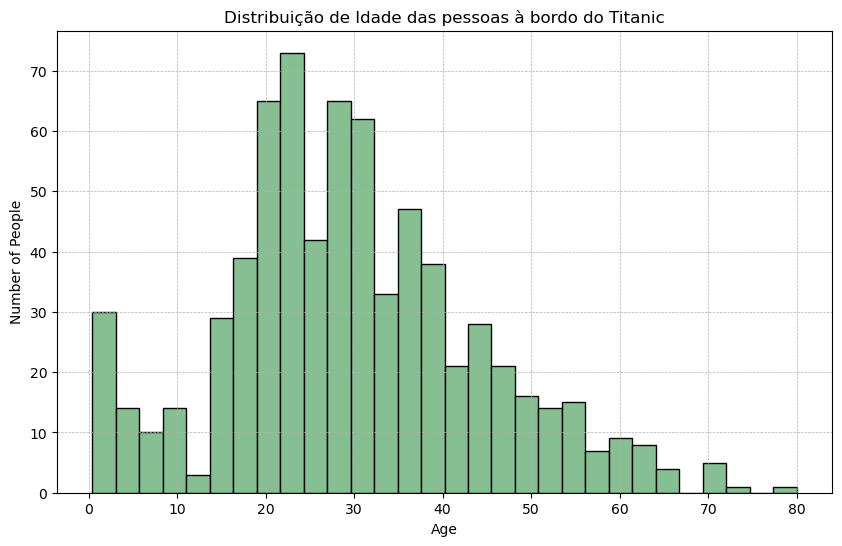

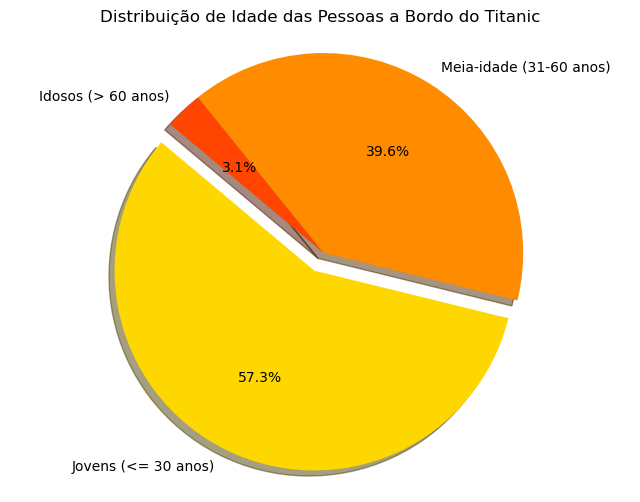

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(tabela['Age'].dropna(), bins=30, color='#86bf91', edgecolor='black') # dropna() is used to exclude any NaN values in the Age column.
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Distribuição de Idade das pessoas à bordo do Titanic')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
young_people = tabela[tabela['Age'] <= 30]
middle_aged_people = tabela[(tabela['Age'] > 30) & (tabela['Age'] <= 60)]
old_people = tabela[tabela['Age'] > 60]

# Contando o número de pessoas para cada grupo etário
num_young_people = len(young_people)
num_middle_aged_people = len(middle_aged_people)
num_old_people = len(old_people)

# Distribuição por idade no gráfico
sizes_age_all = [num_young_people, num_middle_aged_people, num_old_people]
labels_age_all = ['Jovens (<= 30 anos)', 'Meia-idade (31-60 anos)', 'Idosos (> 60 anos)']
colors_age_all = ['#FFD700', '#FF8C00', '#FF4500']
explode_age_all = (0.1, 0, 0)  # Only explode the first slice for emphasis

# Desenhando gráfico com a distribuição das pessoas a bordo do titanic levando a idade como foco
plt.figure(figsize=(8, 6))
plt.pie(sizes_age_all, explode=explode_age_all, labels=labels_age_all, colors=colors_age_all,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribuição de Idade das Pessoas a Bordo do Titanic')
plt.show()

Com isso,Pode se ver que a maioria das pessoas a bordo do Titanic está na faixa de 20

In [ ]:


# Levando em conta a coluna 'Age'
young_survivors = survivors[survivors['Age'] <= 30]
middle_aged_survivors = survivors[(survivors['Age'] > 30) & (survivors['Age'] <= 60)]
old_survivors = survivors[survivors['Age'] > 60]

display(young_survivors)
display(middle_aged_survivors)
display(old_survivors)
num_young_survivors = len(young_survivors)
num_middle_aged_survivors = len(middle_aged_survivors)
num_old_survivors = len(old_survivors)


print(f"Número de sobreviventes jovens (Age <= 30): {num_young_survivors}")
print(f"Número de sobreviventes de meia idade (30 < Age <= 60): {num_middle_aged_survivors}")
print(f"Número de sobreviventes de  (Age > 60): {num_old_survivors}")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6
22,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,8.0292,NaN
...,...,...,...,...,...,...,...,...,...
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,24.0000,NaN
875,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,7.2250,NaN
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,26.0000,NaN
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,16.0000,NaN
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,13.0000,D56
...,...,...,...,...,...,...,...,...,...
857,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,26.5500,E17
862,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,25.9292,D17
865,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,13.0000,NaN
871,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,52.5542,D35


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
275,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,D7
483,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,9.5875,NaN
570,1,2,"Harris, Mr. George",male,62.0,0,0,10.5000,NaN
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0000,A23
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0000,B28


Número de sobreviventes jovens (Age <= 30): 166
Número de sobreviventes de meia idade (30 < Age <= 60): 119
Número de sobreviventes de  (Age > 60): 5


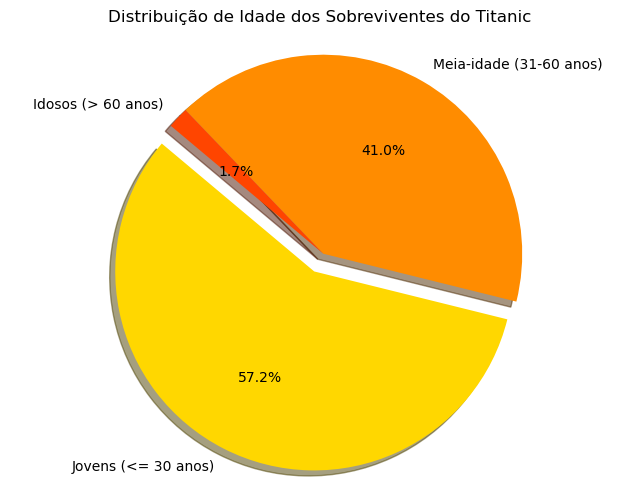

In [ ]:

survivors = tabela[tabela['Survived'] == 1]

young_survivors = survivors[survivors['Age'] <= 30]
middle_aged_survivors = survivors[(survivors['Age'] > 30) & (survivors['Age'] <= 60)]
old_survivors = survivors[survivors['Age'] > 60]

# Contando o número de sobreviventes para cada grupo etário
num_young_survivors = len(young_survivors)
num_middle_aged_survivors = len(middle_aged_survivors)
num_old_survivors = len(old_survivors)

# Dados do gráfico
sizes_age = [num_young_survivors, num_middle_aged_survivors, num_old_survivors]
labels_age = ['Jovens (<= 30 anos)', 'Meia-idade (31-60 anos)', 'Idosos (> 60 anos)']
colors_age = ['#FFD700', '#FF8C00', '#FF4500']
explode_age = (0.1, 0, 0)  # Only explode the first slice for emphasis

# Desenhando o gráfico
plt.figure(figsize=(8, 6))
plt.pie(sizes_age, explode=explode_age, labels=labels_age, colors=colors_age,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribuição de Idade dos Sobreviventes do Titanic')
plt.show()


In [ ]:
victims = tabela[tabela['Survived'] == 0]

# Uma categorização por idade das vitimas
young_victims = victims[victims['Age'] <= 30]
middle_aged_victims = victims[(victims['Age'] > 30) & (victims['Age'] <= 60)]  # Fixed this line
old_victims = victims[victims['Age'] > 60]

# Dataframe para cada grupo etário
display(young_victims)
display(middle_aged_victims)
display(old_victims)

# Contando o número de vitimas de cada grupo etário
num_young_victims = len(young_victims)
num_middle_aged_victims = len(middle_aged_victims)
num_old_victims = len(old_victims)

print(f"Número de vítimas jovens (Age <= 30): {num_young_victims}")
print(f"Número de vítimas de meia idade (30 < Age <= 60): {num_middle_aged_victims}")
print(f"Número de vítimas idosas (Age > 60): {num_old_victims}")



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN
12,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,8.0500,NaN
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,7.8542,NaN
16,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250,NaN
...,...,...,...,...,...,...,...,...,...
877,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,7.8958,NaN
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,10.5167,NaN
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,10.5000,NaN
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,NaN


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.2750,NaN
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,18.0000,NaN
20,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,26.0000,NaN
...,...,...,...,...,...,...,...,...,...
872,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,B51 B53 B55
873,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,9.0000,NaN
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,NaN
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,NaN


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,10.5000,NaN
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792,B30
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,A5
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,NaN
170,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,33.5000,B19
252,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,26.5500,C87
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,7.7500,NaN
326,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,6.2375,NaN
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,C23 C25 C27
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,26.5500,E38


Número de vítimas jovens (Age <= 30): 243
Número de vítimas de meia idade (30 < Age <= 60): 164
Número de vítimas idosas (Age > 60): 17


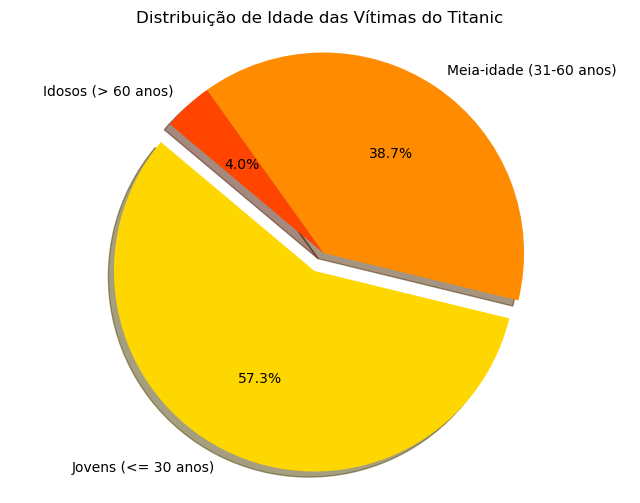

In [ ]:
sizes_age_victims = [num_young_victims, num_middle_aged_victims, num_old_victims]
labels_age_victims = ['Jovens (<= 30 anos)', 'Meia-idade (31-60 anos)', 'Idosos (> 60 anos)']
colors_age_victims = ['#FFD700', '#FF8C00', '#FF4500']
explode_age_victims = (0.1, 0, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes_age_victims, explode=explode_age_victims, labels=labels_age_victims, colors=colors_age_victims,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribuição de Idade das Vítimas do Titanic')
plt.show()

Pode ser observar que houveram mais mortes de pessoas da terceira idade e jovens do que pessoas de meia-idade, provavelmente pois idosos e crianças possuem mobilidade limitada, enquanto pessoas de meia-idade podem ser consideradas as mais capazes fisicamente e mentalmente para escapar do návio.

Agora iremos transformar as colunas "Parch"(Número de filhos à bordo) e "SibSp"(Número de irmãos/irmãs/conjugês à bordo)

In [10]:
tabela['Sobrenome'] = tabela['Name'].apply(lambda x: str(x).split(',')[0])

tabela['NumFamiliares'] = tabela['SibSp'] + tabela['Parch']

tabela['Número de familiares'] = tabela.groupby('Sobrenome')['NumFamiliares'].transform('max') + 1





selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Número de familiares', 'Fare', 'Cabin']
final_tabela = tabela[selected_columns]


display(final_tabela)

,Survived,Pclass,Sex,Age,Número de familiares,Fare,Cabin
0,0,3,male,22.0,2,7.2500,NaN
1,1,1,female,38.0,2,71.2833,C85
2,1,3,female,26.0,1,7.9250,NaN
3,1,1,female,35.0,2,53.1000,C123
4,0,3,male,35.0,1,8.0500,NaN
...,...,...,...,...,...,...,...
886,0,2,male,27.0,1,13.0000,NaN
887,1,1,female,19.0,2,30.0000,B42
888,0,3,female,NaN,4,23.4500,NaN
889,1,1,male,26.0,1,30.0000,C148


In [11]:
solo_passengers = final_tabela[final_tabela['Número de familiares'] == 0]
small_family_passengers = final_tabela[(final_tabela['Número de familiares'] >= 1) & (final_tabela['Número de familiares'] <= 3)]
medium_family_passengers = final_tabela[(final_tabela['Número de familiares'] >= 4) & (final_tabela['Número de familiares'] <= 7)]
large_family_passengers = final_tabela[final_tabela['Número de familiares'] > 8]


num_solo_passengers = len(solo_passengers)
num_small_family_passengers = len(small_family_passengers)
num_medium_family_passengers = len(medium_family_passengers)
num_large_family_passengers = len(large_family_passengers)


print(f"Number of solo passengers (0 family members): {num_solo_passengers}")
print(f"Number of passengers with small families (1-3 family members): {num_small_family_passengers}")
print(f"Number of passengers with medium families (4-7 family members): {num_medium_family_passengers}")
print(f"Number of passengers with large families (>8 family members): {num_large_family_passengers}")


Number of solo passengers (0 family members): 0
Number of passengers with small families (1-3 family members): 792
Number of passengers with medium families (4-7 family members): 86
Number of passengers with large families (>8 family members): 7


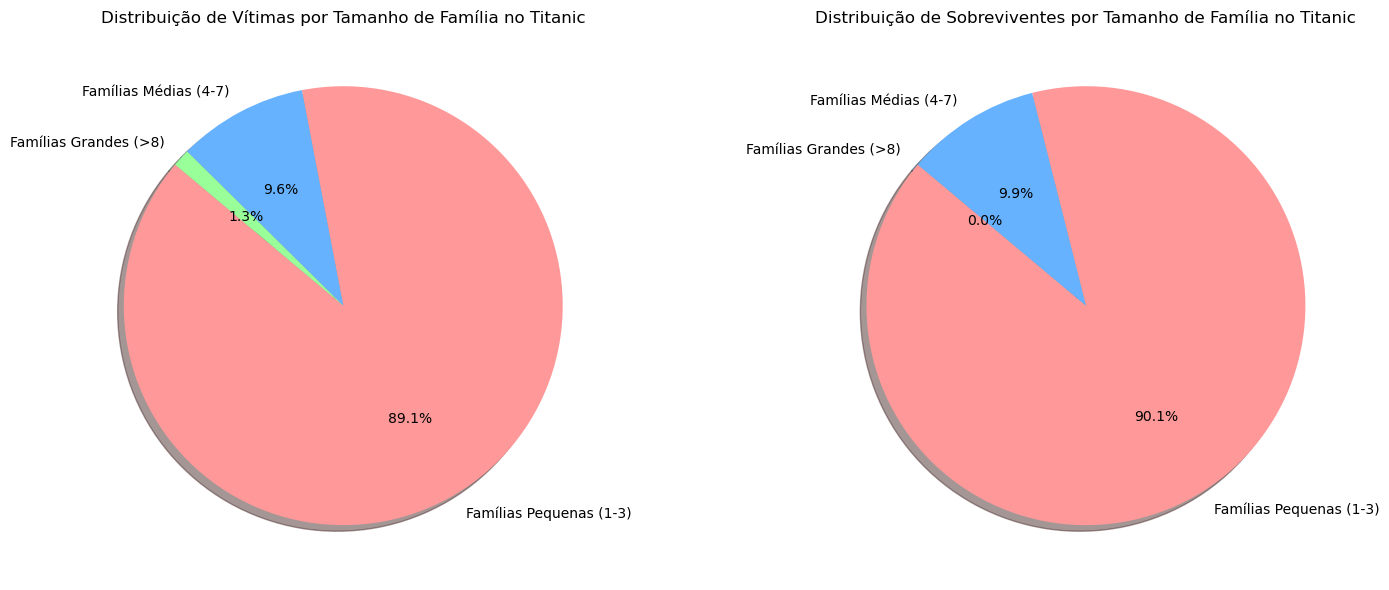

In [ ]:


def count_passengers(dataframe):
    return len(dataframe)


victims_small_family = count_passengers(small_family_passengers[small_family_passengers['Survived'] == 0])
victims_medium_family = count_passengers(medium_family_passengers[medium_family_passengers['Survived'] == 0])
victims_large_family = count_passengers(large_family_passengers[large_family_passengers['Survived'] == 0])


survivors_small_family = count_passengers(small_family_passengers[small_family_passengers['Survived'] == 1])
survivors_medium_family = count_passengers(medium_family_passengers[medium_family_passengers['Survived'] == 1])
survivors_large_family = count_passengers(large_family_passengers[large_family_passengers['Survived'] == 1])


victim_counts = [victims_small_family, victims_medium_family, victims_large_family]
survivor_counts = [survivors_small_family, survivors_medium_family, survivors_large_family]
labels = [ 'Famílias Pequenas (1-3)', 'Famílias Médias (4-7)', 'Famílias Grandes (>8)']
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']


fig, axs = plt.subplots(1, 2, figsize=(15, 6))


axs[0].pie(victim_counts, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Distribuição de Vítimas por Tamanho de Família no Titanic')


axs[1].pie(survivor_counts, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Distribuição de Sobreviventes por Tamanho de Família no Titanic')


plt.tight_layout()
plt.show()


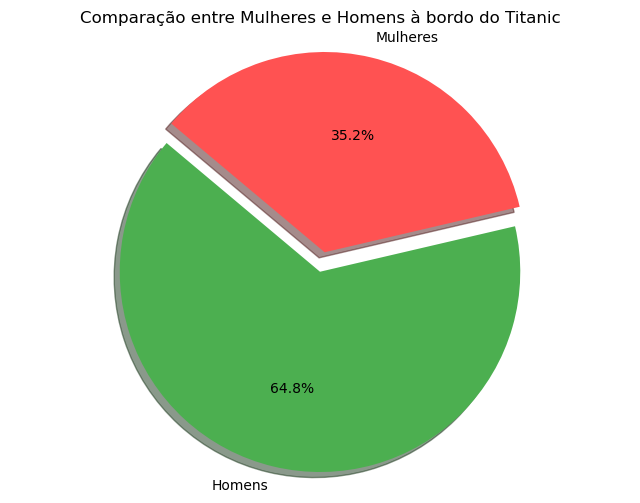

In [12]:
males = tabela[tabela['Sex'] =='male']
females = tabela[tabela['Sex'] == 'female']


sizes = [len(males), len(females)]
labels = ['Homens', 'Mulheres']
colors = ['#4CAF50', '#FF5252']
explode = (0.1, 0)  # Separa a primeira fatia para ênfase

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Comparação entre Mulheres e Homens à bordo do Titanic')
plt.show()



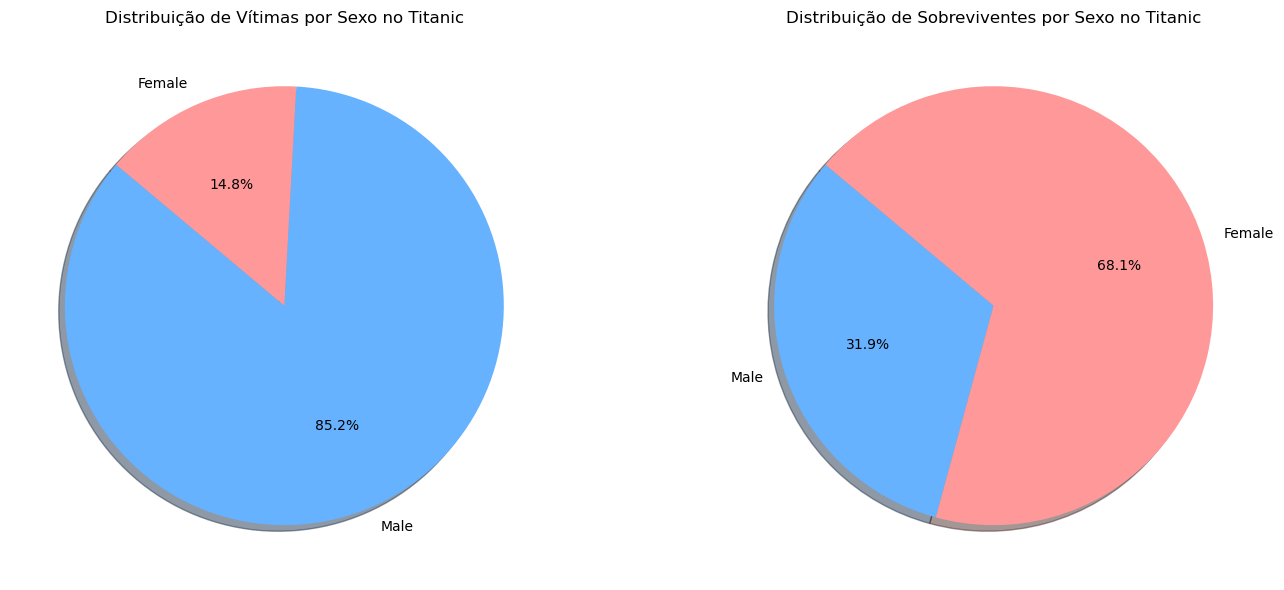

In [ ]:
male_survivors = len(survivors[survivors['Sex'] == 'male'])
female_survivors = len(survivors[survivors['Sex'] =='female'])
male_victims = len(victims[victims['Sex'] == 'male'])
female_victims = len(victims[victims['Sex'] == 'female'])
victim_sex_counts = [male_victims, female_victims]
survivor_sex_counts = [male_survivors, female_survivors]
labels = ['Male', 'Female']
colors = ['#66B2FF', '#FF9999']


fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de pizza das vítimas baseada por gênero
axs[0].pie(victim_sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Distribuição de Vítimas por Sexo no Titanic')

# Gráfico de pizza dos sobreviventes baseada por gênero
axs[1].pie(survivor_sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Distribuição de Sobreviventes por Sexo no Titanic')

# Display
plt.tight_layout()
plt.show()


Podemos afirmar que, apesar de homens terem sido uma maioria à bordo do Titanic, as mulheres são predominantes no quesito sobreviventes. Podemos assumir que elas foram prioridade no quesita de escpae do navio.

Agora que filtramos todas as colunas que podem nos ajudar à descubrir o grande padrão entre os sobreviventes do Titanic, podemos juntar todas nossas informações.

In [13]:
prominent_survivors = tabela[
    (tabela['Sex'] == 'female') &
    (tabela['Número de familiares'] >= 1) &
    (tabela['Número de familiares'] <= 3) &
    (tabela['Pclass'] == 3) &
    (tabela['Survived'] == 1) &
    ((tabela['Age'] < 30) | (tabela['Age'] > 60))
]

other_survivors = tabela[
    (tabela['Sex'] == 'male') &
    (tabela['Número de familiares'] > 3) &
    (tabela['Pclass'] != 3) &
    (tabela['Survived'] == 1) &
    ((tabela['Age'] < 30) | (tabela['Age'] > 60))
]


prominent_female_survivors = prominent_survivors
other_male_survivors = other_survivors

prominent_male_victims = tabela[
    (tabela['Sex'] == 'male') &
    (tabela['Número de familiares'] >= 1) &
    (tabela['Número de familiares'] <= 3) &
    (tabela['Pclass'] == 3) &
    (tabela['Survived'] == 0) &
    ((tabela['Age'] < 30) | (tabela['Age'] > 60))
]

other_female_victims = tabela[
    (tabela['Sex'] == 'female') &
    (tabela['Número de familiares'] > 3) &
    (tabela['Pclass'] != 3) &
    (tabela['Survived'] == 0) &
    ((tabela['Age'] < 30) | (tabela['Age'] > 60))
]
other_female_survivors = tabela[
    (tabela['Sex'] == 'female') &
    (tabela['Número de familiares'] > 3) &
    (tabela['Pclass'] != 3) &
    (tabela['Survived'] == 1) &
    ((tabela['Age'] < 30) | (tabela['Age'] > 60))
]

# Definindo as vitimas masculinas
other_male_victims = tabela[
    (tabela['Sex'] == 'male') &
    (tabela['Número de familiares'] > 3) &
    (tabela['Pclass'] != 3) &
    (tabela['Survived'] == 0) &
    ((tabela['Age'] < 30) | (tabela['Age'] > 60))
]
prominent_female_victims = tabela[
    (tabela['Sex'] == 'female') &
    (tabela['Número de familiares'] >= 1) &
    (tabela['Número de familiares'] <= 3) &
    (tabela['Pclass'] == 3) &
    (tabela['Survived'] == 0) &
    ((tabela['Age'] < 30) | (tabela['Age'] > 60))
]

# Definindo outras vitimas masculinas
other_prominent_male_survivors = tabela[
    (tabela['Sex'] == 'male') &
    (tabela['Número de familiares'] <= 3) &
    (tabela['Pclass'] == 3) &
    (tabela['Survived'] == 1) &
    ((tabela['Age'] < 30) | (tabela['Age'] > 60))
]
print(f"Número de mulheres sobreviventes proeminentes: {len(prominent_female_survivors)}")
print(f"Número de outras mulheres sobreviventes: {len(other_female_survivors)}")
print(f"Número de outros homens sobreviventes: {len(other_male_survivors)}")
print(f"Número de homens vítimas proeminentes: {len(prominent_male_victims)}")
print(f"Número de outros homens vítimas: {len(other_male_victims)}")
print(f"Número de outras mulheres vítimas: {len(other_female_victims)}")
print(f"Número de mulheres vítimas proeminentes: {len(prominent_female_victims)}")




Número de mulheres sobreviventes proeminentes: 34
Número de outras mulheres sobreviventes: 12
Número de outros homens sobreviventes: 5
Número de homens vítimas proeminentes: 121
Número de outros homens vítimas: 4
Número de outras mulheres vítimas: 2
Número de mulheres vítimas proeminentes: 25



Agora iremos fazer uma tabelas para terminar nossas conclusões:

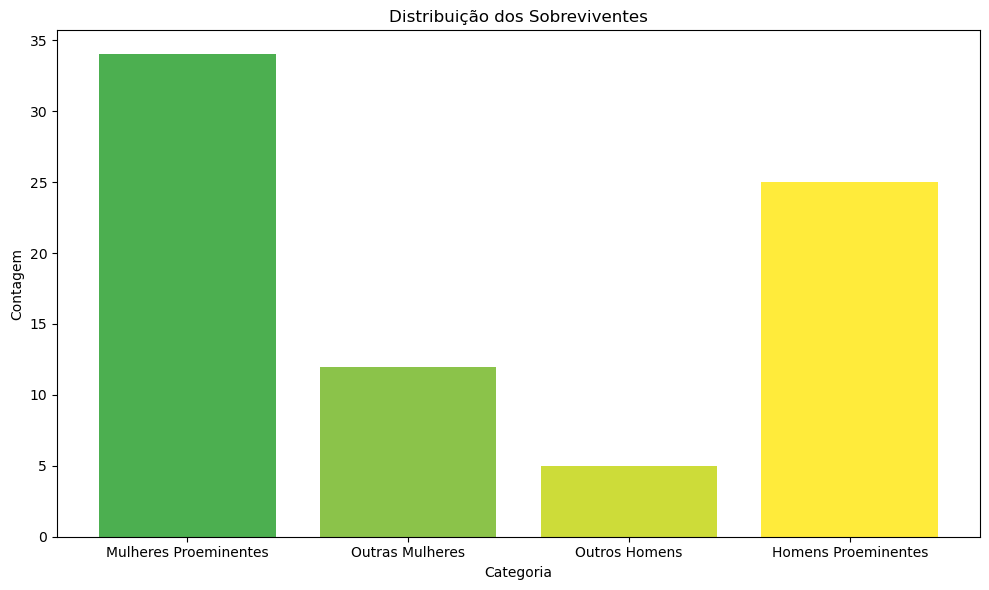

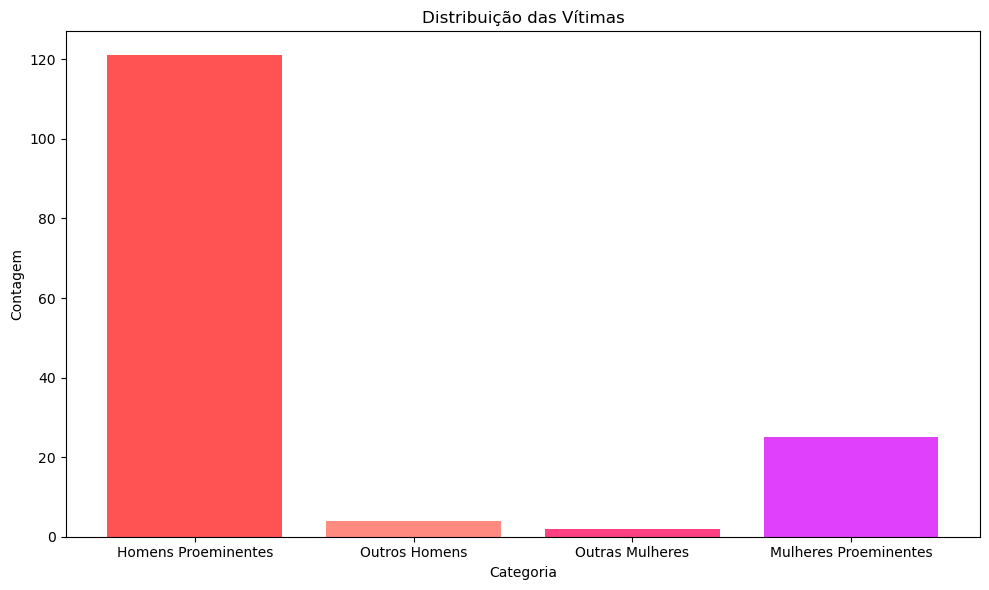

In [14]:
labels_sobreviventes = ['Mulheres Proeminentes', 'Outras Mulheres', 'Outros Homens', 'Homens Proeminentes']
contagem_sobreviventes = [len(prominent_female_survivors), len(other_female_survivors), len(other_male_survivors), len(other_prominent_male_survivors)]

# Dados das vítimas
labels_vitimas = ['Homens Proeminentes', 'Outros Homens', 'Outras Mulheres', 'Mulheres Proeminentes']
contagem_vitimas = [len(prominent_male_victims), len(other_male_victims), len(other_female_victims), len(prominent_female_victims)]

# Gráfico de barra para sobreviventes
plt.figure(figsize=(10,6))
plt.bar(labels_sobreviventes, contagem_sobreviventes, color=['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B'])
plt.title('Distribuição dos Sobreviventes')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Gráfico de barra para vítimas
plt.figure(figsize=(10,6))
plt.bar(labels_vitimas, contagem_vitimas, color=['#FF5252', '#FF8A80', '#FF4081', '#E040FB'])
plt.title('Distribuição das Vítimas')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

<h1> CONCLUSÃO </h1>

<br>

Com base na análise de dados realizada, podemos concluir que as vítimas predominantes são: Homens com idade menores que 30 ou maiores que 60, da classe 1 ou 2, e com um número de familiares maior que 3 à bordo do Titanic, enquanto as sobreviventes predominantes são exatamente o contrário disso.

<h1> Proposta de melhoria </h1><br>
<ul>
    <li>Evacuação Prioritária: Dê prioridade para crianças, idosos e mulheres durante a evacuação.</li>
<li>Treinamento de Segurança para a 3ª Classe: Ofereça treinamento de segurança específico para passageiros da 3ª classe.</li>
<li>Disponibilidade e Treinamento de Botes Salva-Vidas: Garanta que haja botes salva-vidas suficientes e ofereça treinamento sobre como usá-los.</li>
<li>Medidas de Segurança em Portos: Investigue e replique as boas práticas de segurança em portos.</li>
<li>Inspeções de Segurança: Faça verificações regulares do equipamento de segurança do navio.</li>
<li>Comunicação Clara: Mantenha canais de comunicação claros entre a tripulação e os passageiros.</li>
<li>Proibição de Viagens em Águas Perigosas: Evite completamente rotas marítimas conhecidas por condições adversas ou áreas com histórico de icebergs.</li>
    <li>Zonas de Evacuação Rápida: Divida o navio em zonas de evacuação com saídas de emergência que levem diretamente ao mar, facilitando o acesso rápido aos botes salva-vidas.</li>
    <li>Sistemas de Propulsão de Emergência: Equipe botes salva-vidas com sistemas de propulsão rápida para afastá-los do navio em chamas ou afundando rapidamente.</li>
    <li>Trajes de Imersão Obrigatórios: Exija que todos os passageiros vistam trajes de imersão durante situações de emergência, garantindo flutuação e proteção contra águas geladas.</li>
    <li>Paraquedas Aquáticos: Forneça paraquedas aquáticos para os passageiros, permitindo que eles pulem com segurança do navio e flutuem até a superfície da água.</li>
